<a href="https://colab.research.google.com/github/touhid0503/Heart_Disease_Diagnosis_Support_System/blob/main/HSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#14-01-26



---

# 🛠 Full Step-by-Step Methodology

**Heart Disease Diagnosis Support System Using Machine Learning**

---

## Step 1: Problem Identification & Objective Definition

Heart disease is influenced by multiple clinical, lifestyle, and demographic factors. Traditional analysis may overlook complex interactions between these variables.

**Objective:**
To build a machine learning–based **diagnosis support system** that predicts whether a patient is at risk of heart disease using structured patient data.

**Outcome:**

* Binary prediction: *Heart Disease* / *No Heart Disease*
* Risk probability score to support clinical decision-making

> This system assists healthcare professionals; it does not replace medical diagnosis.

---

## Step 2: Dataset Understanding

A structured dataset containing **10,000 patient records** is used.

### Key Characteristics:

* **Target variable:** Heart Disease Status (Yes / No)
* **Feature types:**

  * Demographic: Age, Gender, Country, Income
  * Lifestyle: Smoking, Alcohol Consumption, Physical Activity, Exercise Habits, Sleep Hours, Stress Level
  * Clinical: Blood Pressure, Cholesterol, BMI, Triglycerides, Heart Rate
  * Medical history: Diabetes, Family History, CRP, Homocysteine, HDL levels

Understanding feature meaning and data types is essential before preprocessing.

---

## Step 3: Data Preprocessing

Raw healthcare data requires careful preparation.

### 3.1 Missing Value Treatment

* Numerical features → mean or median imputation
* Categorical features → mode imputation

### 3.2 Encoding Categorical Variables

* Binary variables → label encoding
* Multi-category variables → one-hot encoding

### 3.3 Feature Scaling

* Numerical features are standardized to ensure equal contribution to the models.

### 3.4 Train–Test Split

* Dataset split into **80% training** and **20% testing**
* Stratified sampling to preserve class distribution

---

## Step 4: Exploratory Data Analysis (EDA)

EDA is conducted to understand data patterns and relationships.

### Techniques Used:

* Distribution plots of numerical features
* Correlation heatmaps
* Comparison of feature values between heart disease and non-disease groups

EDA helps identify influential factors such as age, cholesterol level, smoking, stress, and blood pressure.

---

## Step 5: Handling Class Imbalance

Heart disease datasets often contain fewer positive cases.

### Solutions Applied:

* Stratified sampling
* Class weighting during model training
* Optional resampling techniques (e.g., SMOTE)

This ensures the model does not become biased toward the majority class.

---

## Step 6: Model Selection

Multiple machine learning algorithms are evaluated.

### Models Implemented:

* **Logistic Regression** (baseline & interpretable)
* **Random Forest Classifier** (ensemble learning)
* **Support Vector Machine (SVM)**
* *(Optional)* Gradient Boosting / XGBoost

Using multiple models improves reliability and comparison.

---

## Step 7: Model Training

* Models are trained on the training dataset
* Hyperparameters are tuned using cross-validation
* Overfitting is monitored by comparing training and validation performance

---

## Step 8: Model Evaluation

Models are evaluated on the unseen test dataset.

### Evaluation Metrics:

* Accuracy
* Precision
* **Recall (primary metric)**
* F1-score
* ROC–AUC
* Confusion Matrix

**Recall is prioritized** to minimize false negatives, which is critical in healthcare applications.

---

## Step 9: Model Comparison & Selection

The best-performing model is selected based on:

* High recall
* Balanced precision–recall
* Stable ROC–AUC

---

## Step 10: Model Explainability

To ensure transparency:

* Feature importance analysis is performed
* Key risk factors influencing predictions are identified
* Optional SHAP analysis for instance-level explanations

Explainability builds trust in medical decision-support systems.

---

## Step 11: System Output Design

The final system outputs:

* Predicted heart disease status
* Probability-based risk score
* Most influential risk factors

---

## Step 12: Ethical Considerations & Limitations

* The system is a support tool, not a diagnostic authority
* Dataset limitations may affect generalization
* Data privacy and ethical AI usage are emphasized

---

## Step 13: Conclusion & Future Scope

The project demonstrates the effectiveness of machine learning in healthcare risk prediction.

### Future Improvements:

* Real-world clinical datasets
* Real-time patient monitoring
* Integration with hospital systems
* Advanced ensemble learning models

---

# 🗓 1-Month Project Roadmap (30 Days)

---

## **Week 1: Data Understanding & Preparation**

**Days 1–2**

* Dataset exploration
* Understand features and target variable

**Days 3–4**

* Handle missing values
* Encode categorical features

**Days 5–7**

* Feature scaling
* Train–test split
* Initial EDA visualizations

---

## **Week 2: Exploratory Analysis & Baseline Model**

**Days 8–10**

* Detailed EDA
* Correlation analysis
* Identify key risk factors

**Days 11–14**

* Implement Logistic Regression
* Baseline evaluation and metrics

---

## **Week 3: Advanced Models & Optimization**

**Days 15–17**

* Implement Random Forest
* Tune hyperparameters

**Days 18–20**

* Implement SVM / Gradient Boosting
* Handle class imbalance

**Day 21**

* Compare all models
* Select best-performing model

---

## **Week 4: Explainability, Documentation & Presentation**

**Days 22–24**

* Feature importance analysis
* Explainability (SHAP or similar)

**Days 25–27**

* Final testing and result validation
* Prepare performance tables and graphs

**Days 28–30**

* Write final report
* Prepare presentation slides
* Rehearse viva explanation

---


# 18-01-26

#Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Reading

In [26]:
df=pd.read_csv("/content/heart_disease.csv")

In [27]:
df.head(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
5,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
6,78.0,Female,121.0,175.0,High,Yes,Yes,Yes,18.042332,No,...,No,Medium,Medium,9.240911,Medium,107.0,85.0,11.582983,19.659461,No
7,38.0,Female,161.0,187.0,Low,Yes,Yes,Yes,34.736683,No,...,No,Low,Medium,7.841008,High,228.0,111.0,4.929381,17.146599,No
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,...,Yes,High,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
9,75.0,Male,144.0,252.0,Low,Yes,Yes,No,30.142149,No,...,Yes,Low,Medium,4.002662,High,199.0,96.0,10.005698,7.604357,No


#Checking Duplicates

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

#Null value check

In [30]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


#Handling missing values

In [31]:
numerical_cols_with_missing = df.select_dtypes(include=['float64']).columns
categorical_cols_with_missing = df.select_dtypes(include=['object']).columns

for col in numerical_cols_with_missing:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

for col in categorical_cols_with_missing:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

display(df.isnull().sum())


,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [32]:
df.shape

(10000, 21)

#Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

binary_cols = []
multiclass_cols = []

for col in categorical_cols:
    if df[col].nunique() == 2:
        binary_cols.append(col)
    else:
        multiclass_cols.append(col)

print("Binary columns for Label Encoding:", binary_cols)
print("Multi-category columns for One-Hot Encoding:", multiclass_cols)

label_encoder = LabelEncoder()
for col in binary_cols:
    if col == 'Heart Disease Status':
        df[col] = df[col].map({'No': 0, 'Yes': 1})
    else:
        df[col] = label_encoder.fit_transform(df[col])
    print(f"Label encoded column: {col}")

df = pd.get_dummies(df, columns=multiclass_cols, drop_first=True)
print(f"\nOne-hot encoded columns: {multiclass_cols}")

display(df.head())

Binary columns for Label Encoding: ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Heart Disease Status']
Multi-category columns for One-Hot Encoding: ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
Label encoded column: Gender
Label encoded column: Smoking
Label encoded column: Family Heart Disease
Label encoded column: Diabetes
Label encoded column: High Blood Pressure
Label encoded column: Low HDL Cholesterol
Label encoded column: High LDL Cholesterol
Label encoded column: Heart Disease Status

One-hot encoded columns: ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']


,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,...,Homocysteine Level,Heart Disease Status,Exercise Habits_Low,Exercise Habits_Medium,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium
0,56.0,1,153.0,155.0,1,1,0,24.991591,1,1,...,12.387250,0,False,False,False,False,False,True,False,True
1,69.0,0,146.0,286.0,0,1,1,25.221799,0,1,...,19.298875,0,False,False,False,True,False,False,False,True
2,46.0,1,126.0,216.0,0,0,0,29.855447,0,1,...,11.230926,0,True,False,True,False,True,False,True,False
3,32.0,0,122.0,293.0,1,1,0,24.130477,1,0,...,5.961958,0,False,False,True,False,False,False,False,False
4,60.0,1,166.0,242.0,1,1,1,20.486289,1,0,...,8.153887,0,True,False,True,False,False,False,False,False


In [34]:
df.sample(10)

,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,...,Homocysteine Level,Heart Disease Status,Exercise Habits_Low,Exercise Habits_Medium,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium
4233,29.0,1,146.0,228.0,1,0,1,21.844544,0,0,...,18.213845,0,True,False,False,False,False,True,False,True
7444,27.0,0,144.0,233.0,1,0,0,32.955671,1,0,...,13.186893,0,True,False,False,False,True,False,False,False
2962,43.0,0,161.0,161.0,1,0,1,34.324856,1,1,...,14.623031,0,False,False,True,False,False,True,True,False
5109,30.0,1,170.0,203.0,1,0,0,32.172535,1,0,...,14.746014,0,False,True,True,False,False,False,True,False
4882,22.0,1,127.0,206.0,1,1,1,25.620563,1,0,...,7.310571,0,False,False,False,True,True,False,True,False
2491,35.0,1,172.0,280.0,0,0,1,20.299668,1,0,...,9.721771,0,False,True,False,True,False,False,False,True
2899,28.0,0,149.0,159.0,1,1,1,24.894563,1,1,...,6.150759,0,False,False,True,False,False,True,False,False
7220,18.0,0,124.0,159.0,1,1,1,31.660335,0,0,...,5.958982,0,False,True,True,False,False,True,False,False
4951,64.0,0,165.0,249.0,0,1,0,22.108859,1,0,...,8.149081,0,True,False,False,True,False,True,False,True
4573,78.0,1,137.0,233.0,0,1,1,30.910783,1,1,...,15.309142,0,False,True,False,False,True,False,False,False


#19-01-26

#Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()
if 'Heart Disease Status' in numerical_cols:
    numerical_cols.remove('Heart Disease Status')

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())


,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,...,Homocysteine Level,Heart Disease Status,Exercise Habits_Low,Exercise Habits_Medium,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium
0,0.369061,1,0.184661,-1.618712,1,1,0,-0.648537,1,1,...,-0.015959,0,False,False,False,False,False,True,False,True
1,1.084657,0,-0.214077,1.392213,0,1,1,-0.611996,0,1,...,1.584367,0,False,False,False,True,False,False,False,True
2,-0.181398,1,-1.353328,-0.216679,0,0,0,0.123523,0,1,...,-0.283696,0,True,False,True,False,True,False,True,False
3,-0.952040,0,-1.581178,1.553102,1,1,0,-0.785226,1,0,...,-1.503680,0,False,False,True,False,False,False,False,False
4,0.589244,1,0.925175,0.380910,1,1,1,-1.363683,1,0,...,-0.996158,0,True,False,True,False,False,False,False,False


#Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (8000, 24)
X_test shape: (2000, 24)
y_train shape: (8000,)
y_test shape: (2000,)


#25-01-26

# Exploratory Data Analysis (EDA)

#Distribution plots of numerical features

In [37]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,...,Homocysteine Level,Heart Disease Status,Exercise Habits_Low,Exercise Habits_Medium,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium
0,0.369061,1,0.184661,-1.618712,1,1,0,-0.648537,1,1,...,-0.015959,0,False,False,False,False,False,True,False,True
1,1.084657,0,-0.214077,1.392213,0,1,1,-0.611996,0,1,...,1.584367,0,False,False,False,True,False,False,False,True
2,-0.181398,1,-1.353328,-0.216679,0,0,0,0.123523,0,1,...,-0.283696,0,True,False,True,False,True,False,True,False
3,-0.952040,0,-1.581178,1.553102,1,1,0,-0.785226,1,0,...,-1.503680,0,False,False,True,False,False,False,False,False
4,0.589244,1,0.925175,0.380910,1,1,1,-1.363683,1,0,...,-0.996158,0,True,False,True,False,False,False,False,False


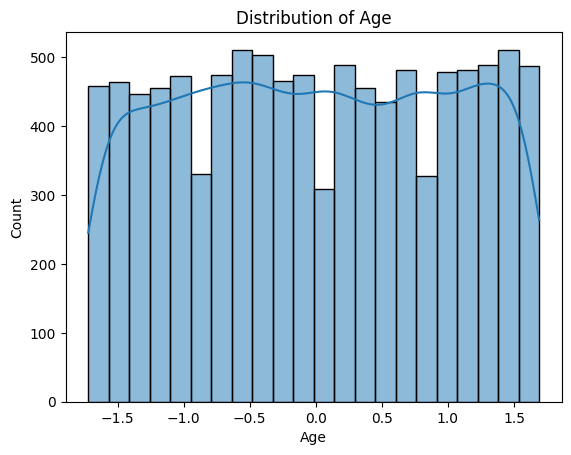

In [38]:
sns.histplot(df['Age'],kde=True)
plt.title(f'Distribution of Age')
plt.show()

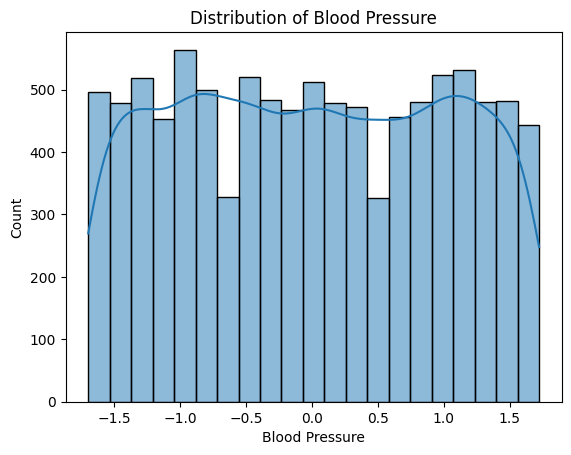

In [39]:
sns.histplot(df['Blood Pressure'],kde=True)
plt.title(f'Distribution of Blood Pressure')
plt.show()

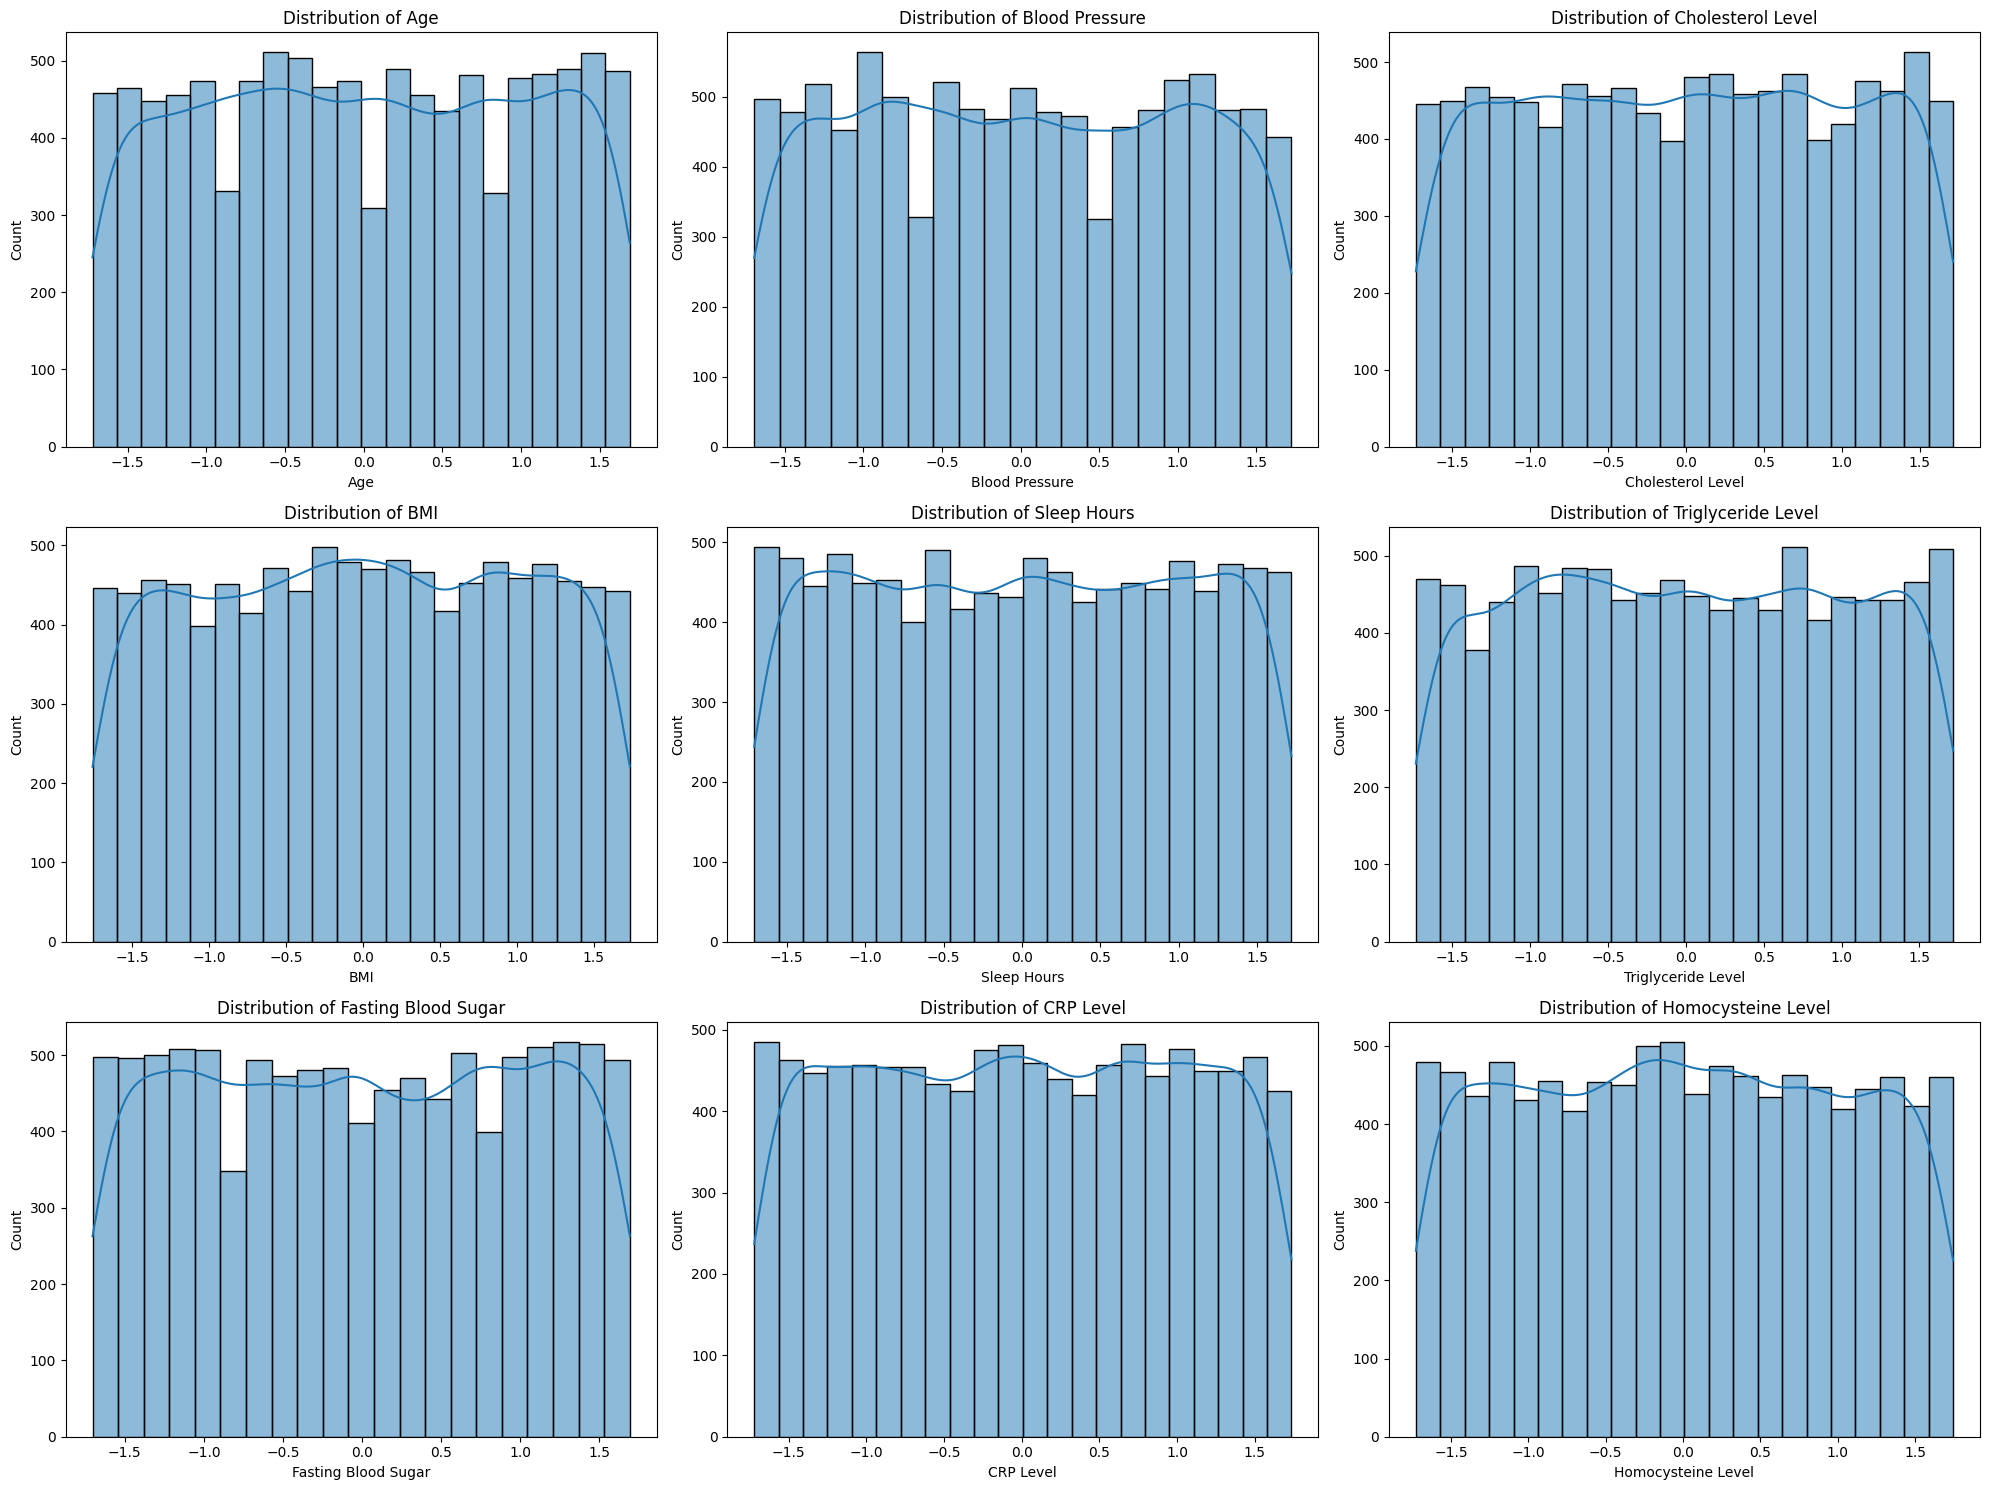

In [40]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

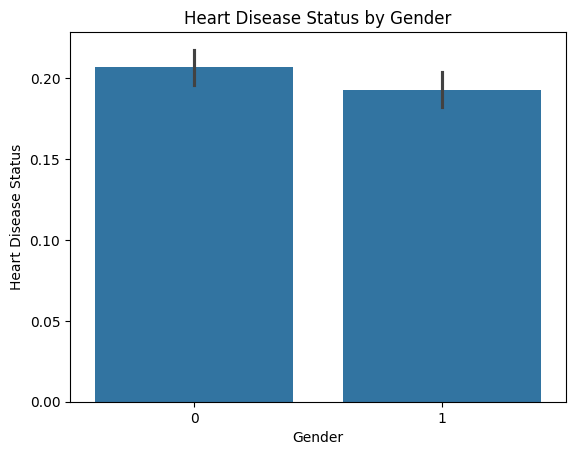

In [41]:
sns.barplot(x='Gender', y='Heart Disease Status', data=df)
plt.title('Heart Disease Status by Gender')
plt.show()

#Correlation heatmaps

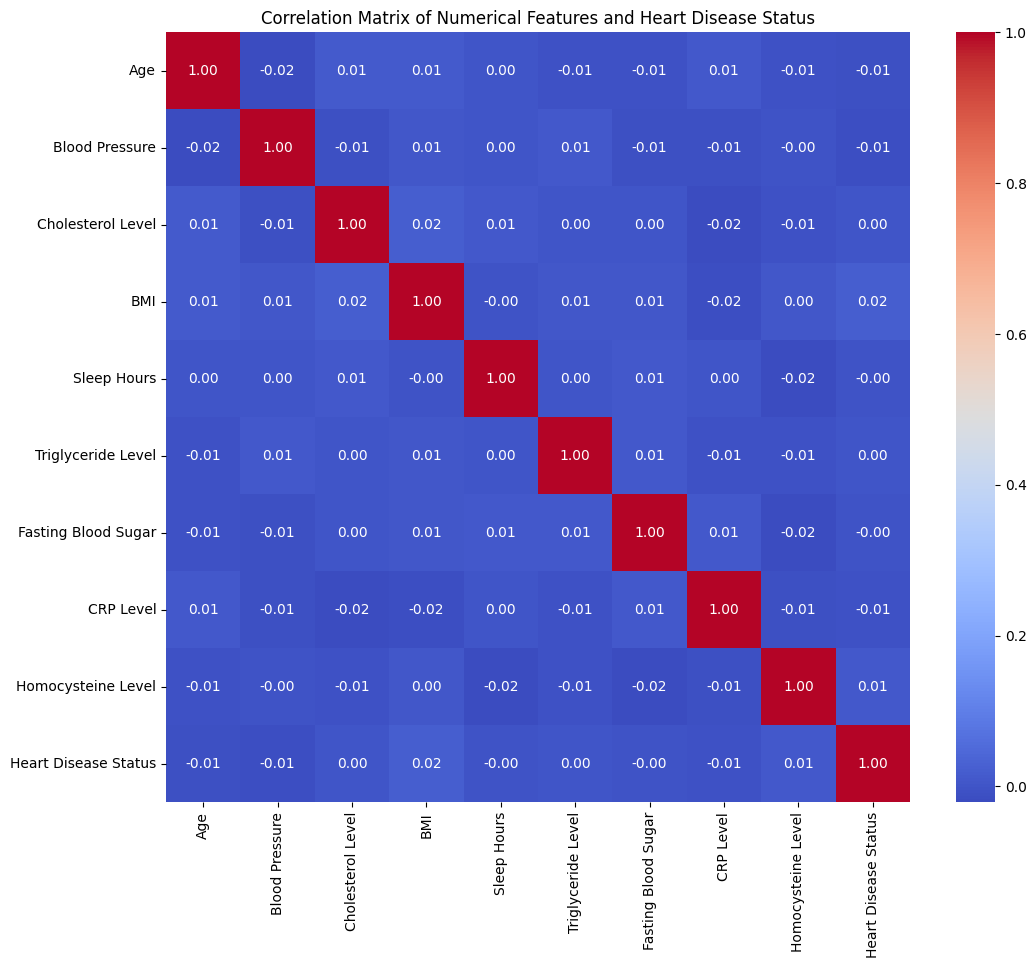

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols + ['Heart Disease Status']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Heart Disease Status')
plt.show()

In [43]:
df.select_dtypes(include=np.number).corr()['Heart Disease Status']

,Heart Disease Status
Age,-0.009231
Gender,-0.017200
Blood Pressure,-0.013876
Cholesterol Level,0.002703
Smoking,0.002701
Family Heart Disease,-0.007500
Diabetes,-0.002700
BMI,0.019682
High Blood Pressure,0.002200
Low HDL Cholesterol,-0.006000


#28-01-26

# Comparison of feature values between heart disease and non-disease groups


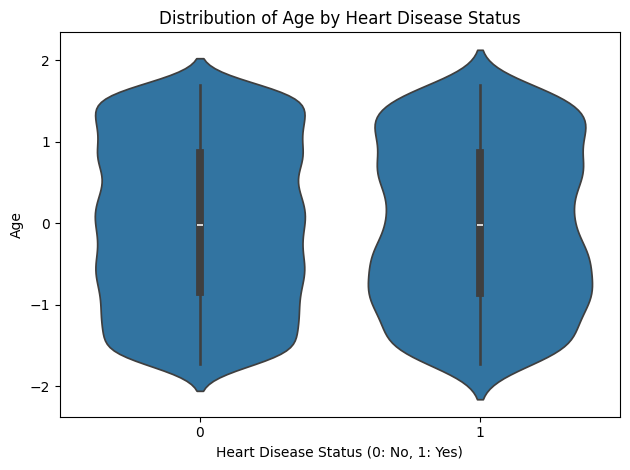

In [44]:
sns.violinplot(x='Heart Disease Status',y='Age',data=df)
plt.title(f'Distribution of Age by Heart Disease Status')
plt.xlabel('Heart Disease Status (0: No, 1: Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

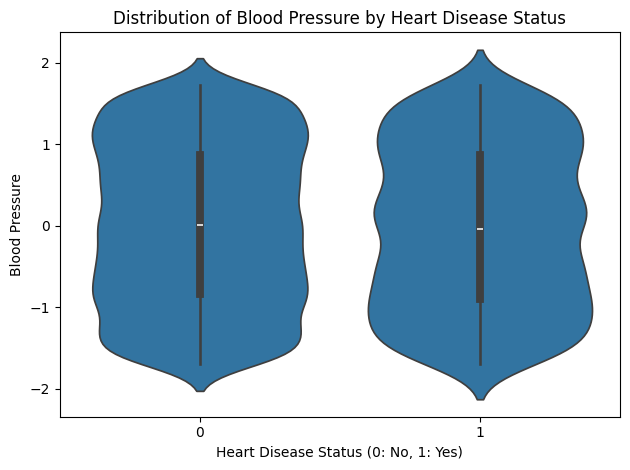

In [45]:
sns.violinplot(x='Heart Disease Status',y='Blood Pressure',data=df)
plt.title(f'Distribution of Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease Status (0: No, 1: Yes)')
plt.ylabel('Blood Pressure')
plt.tight_layout()
plt.show()

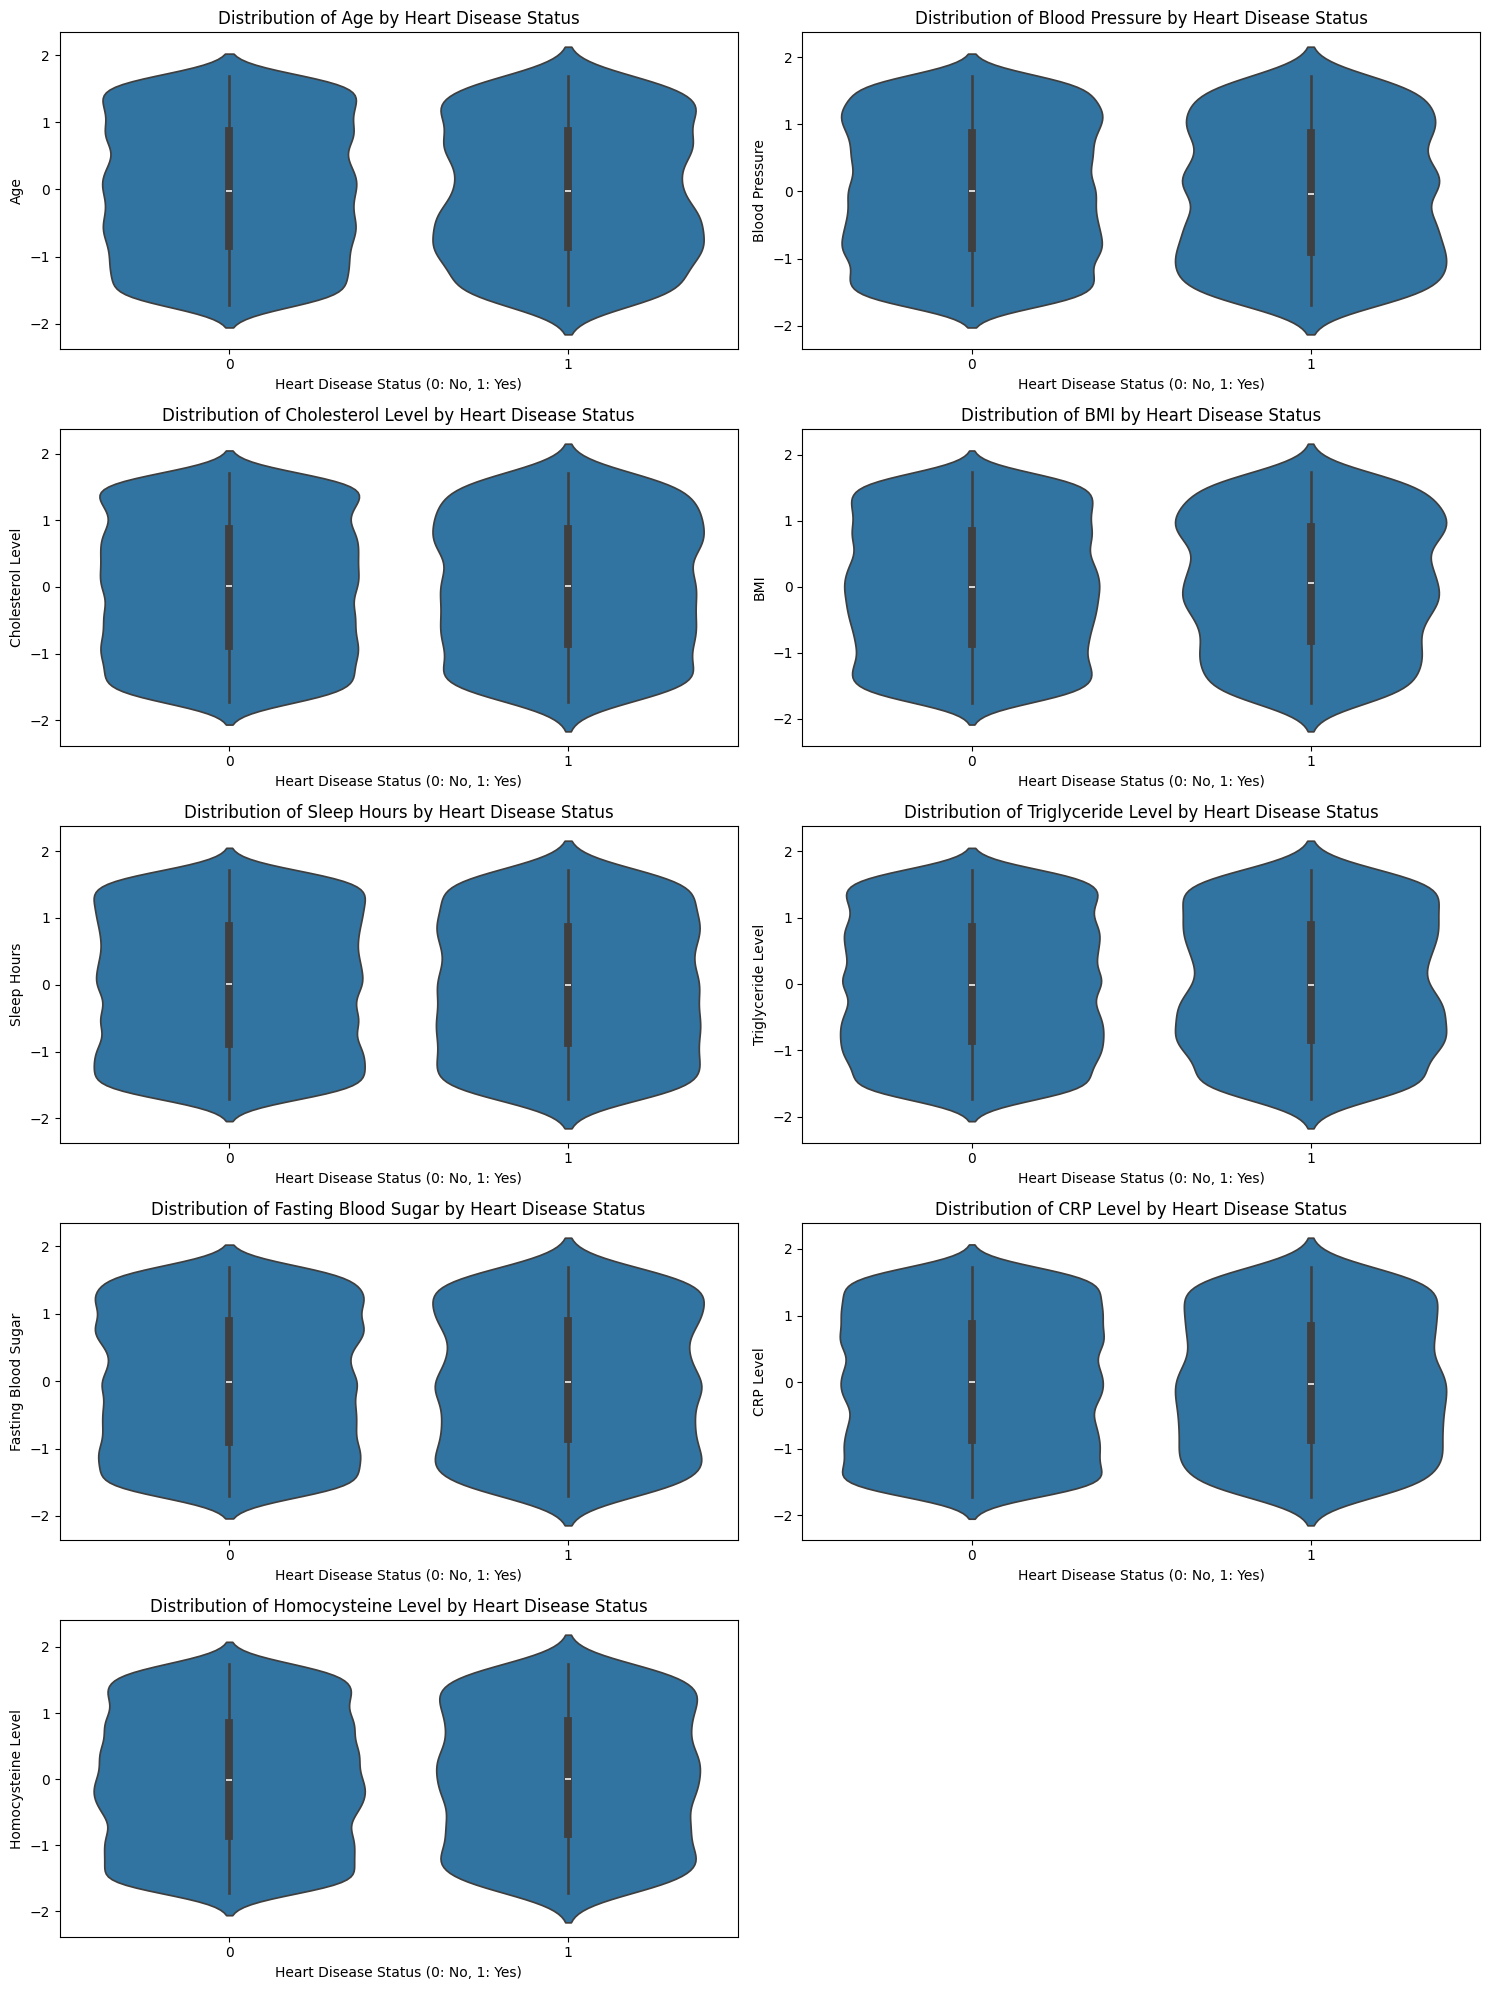

In [46]:
numerical_features_to_compare = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_features_to_compare):
    plt.subplot(5, 2, i + 1)
    sns.violinplot(x='Heart Disease Status', y=col, data=df)
    plt.title(f'Distribution of {col} by Heart Disease Status')
    plt.xlabel('Heart Disease Status (0: No, 1: Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

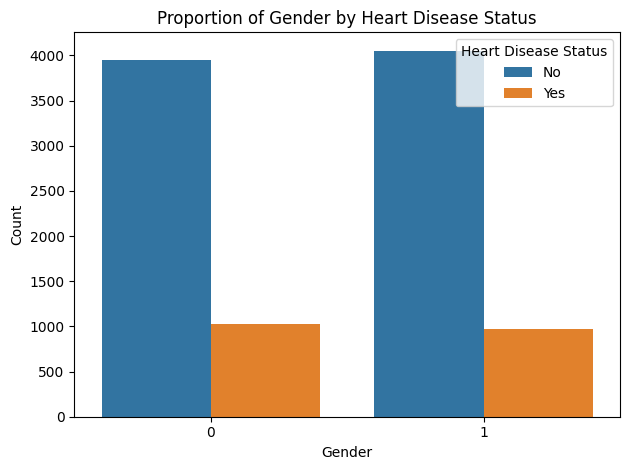

In [48]:
sns.countplot(hue='Heart Disease Status',x='Gender',data=df)
plt.title(f'Proportion of Gender by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(title='Heart Disease Status', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

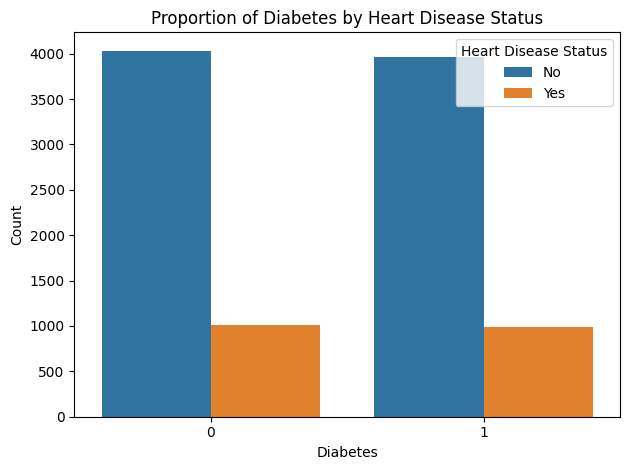

In [49]:
sns.countplot(hue='Heart Disease Status',x='Diabetes',data=df)
plt.title(f'Proportion of Diabetes by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Diabetes')
plt.legend(title='Heart Disease Status', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

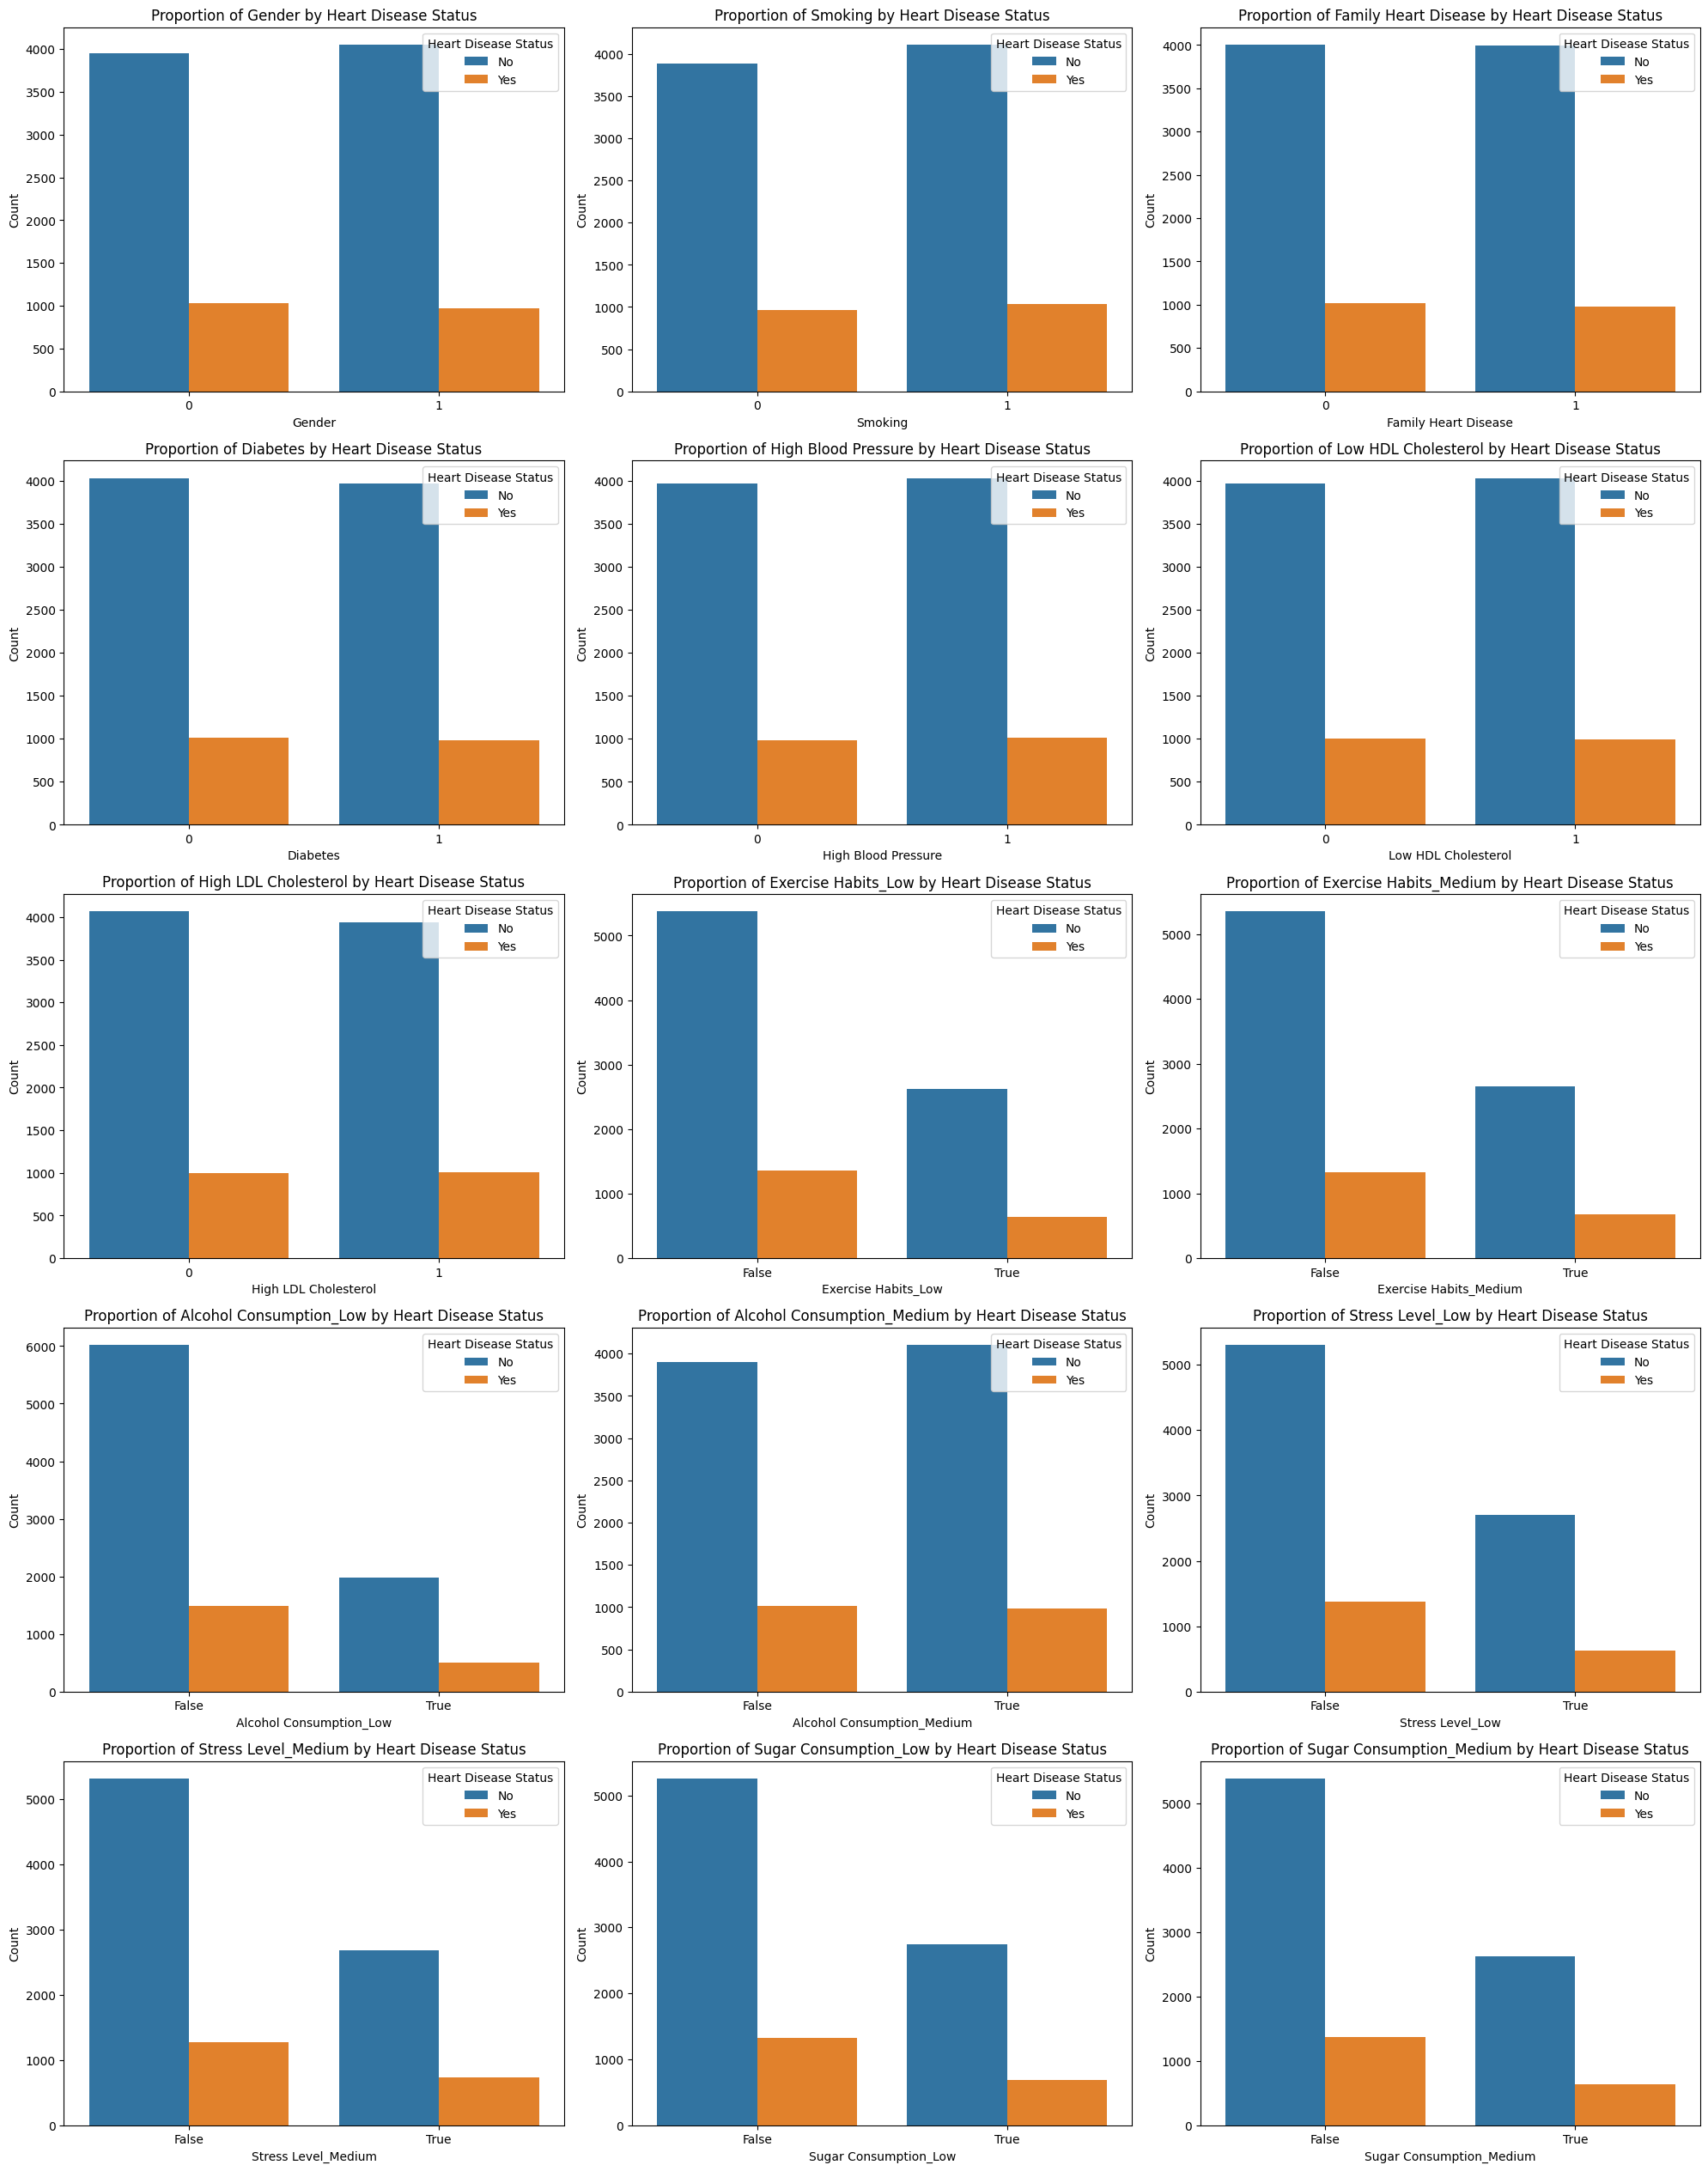

In [51]:
categorical_features_to_compare = [
    'Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure',
    'Low HDL Cholesterol', 'High LDL Cholesterol', 'Exercise Habits_Low', 'Exercise Habits_Medium',
    'Alcohol Consumption_Low', 'Alcohol Consumption_Medium', 'Stress Level_Low', 'Stress Level_Medium',
    'Sugar Consumption_Low', 'Sugar Consumption_Medium'
]

plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical_features_to_compare):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=col, hue='Heart Disease Status', data=df)
    plt.title(f'Proportion of {col} by Heart Disease Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease Status', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

#29-01-26